# Preamble

In [20]:
import pandas as pd
import matplotlib as mpl
import os
import numpy as np
import sys
import emcee

In [21]:
# FOR THE CLUSTER
#from Likelihood_Functions import *
#HomeDir = '/home/srw9487/LuminousBasin/'
#DataDir = HomeDir+'products_80610202001_orbit1_chu12_spatialARF/'
#MockDataDir = HomeDir+'mock data/Event Lists/'

#FOR TESTING
from Likelihood_Functions_ShalmaCopy import *
HomeDir = '/Users/shalm/Dropbox/LuminousBasin/code/'
DataDir = HomeDir+'master/likelihood/products_80610202001_orbit1_chu12_spatialARF/'
MockDataDir = HomeDir+'Shalma code/mock data/Event Lists/'
MockResultsDir = '/Users/shalm/Dropbox/LuminousBasin/luminous-basin/mocks/results/'
sys.path.insert(0, HomeDir)

In [22]:
from tqdm import tqdm

#plt.rcdefaults()
#fontsize = 14
#rcParams['font.family'] = 'sans-serif'
#font_manager.findfont('serif', rebuild_if_missing=True)
#rcParams.update({'font.size':fontsize})

In [23]:
if not os.path.exists(MockDataDir):
    print('%s doesnt exist!' %MockDataDir,flush=True)
    sys.exit()

# Parameters

In [24]:
sigma_E = 0.166 # energy resolution
width_E = 0.04 # energy bin width is 40 keV
alpha_f = 170.66855149 #fiducial
delta_f = 4.02092024

In [74]:
m_list = np.arange(3.2,40.0,0.1)
np.shape(m_list)

(368,)

In [26]:
# FOR CLUSTER
#i_mock = sys.argv[1]
#i_m = sys.argv[2]
#m = m_list[i_m]

# FOR TESTING
i_mock = 6
i_m = 43
m = m_list[i_m]
print('m = ',m)

m =  7.300000000000004


In [27]:
# FOR REAL DATA:
#good_time_ints = [
#(  3.37603080e+08,   3.37603330e+08),
#(  3.37603330e+08,   3.37603380e+08),
#(  3.37603380e+08,   3.37603380e+08),
#(  3.37603580e+08,   3.37603581e+08),
#(  3.37603630e+08,   3.37605080e+08),
#(  3.37605081e+08,   3.37605230e+08)]
#duration = np.max(good_time_ints)- np.min(good_time_ints)
# livetime = ????

# FOR MOCK DATA: 
good_time_ints = np.asarray([
    [3.37603341e+08, 3.376033795e+08],
    [3.376036305e+08, 3.3760522972e+08]
])
duration = np.max(good_time_ints)- np.min(good_time_ints)
exposure = ((good_time_ints[0,1]-good_time_ints[0,0]) + (good_time_ints[1,1]-good_time_ints[1,0]))
livetime = np.asarray([1501.16599845754, 1481.86081041239])/exposure # effective fractional livetime of A and B

In [28]:
# time bins
N_bins_t = 10
bins_t = np.linspace(good_time_ints[0][0], good_time_ints[-1][1], N_bins_t+1)

# energy bins
bins_E = np.arange(1.6,200.01,width_E)

In [29]:
file_box_centers = DataDir+'box_centers.txt'
list_file_arf = [DataDir+'arfs/'+file for file in listdir(DataDir+'arfs/')]
df_box = load_box(file_box_centers)
df_arf = load_arf(list_file_arf,bins_E,df_box)

In [30]:
list_file_events = [MockDataDir+'%s_A.csv' %i_mock, MockDataDir+'%s_B.csv' %i_mock]

In [31]:
mock_results_dir = MockResultsDir+'results_k10_%s_fid.csv'%i_mock
print(mock_results_dir)

/Users/shalm/Dropbox/LuminousBasin/luminous-basin/mocks/results/results_k10_6_fid.csv


# Likelihood

In [32]:
df_data = load_data(m,sigma_E,df_box,df_arf,good_time_ints,livetime,bins_t,bins_E,list_file_events,file_box_centers,list_file_arf)

C:\Users\shalm\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [33]:
df_data

,detector,idx_t,idx_E,i1,i2,t,E,ra,dec,exp,arf,Omega,counts
0,A,0,44,-6,-6,3.376033e+08,3.36,170.889,3.75981,35.289849,43.372936,1.0,0
1,A,0,44,-6,-5,3.376033e+08,3.36,170.881,3.77425,35.289849,31.654016,1.0,0
2,A,0,44,-6,-4,3.376033e+08,3.36,170.872,3.78868,35.289849,52.484219,1.0,0
3,A,0,44,-6,-3,3.376033e+08,3.36,170.864,3.80311,35.289849,51.703667,1.0,0
4,A,0,44,-6,-2,3.376033e+08,3.36,170.856,3.81755,35.289849,90.566414,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57455,B,9,59,6,4,3.376050e+08,3.96,170.992,4.00073,170.897354,39.214531,1.0,0
57456,B,9,59,6,5,3.376050e+08,3.96,170.984,4.01517,170.897354,37.856091,1.0,1
57457,B,9,59,6,5,3.376050e+08,3.96,170.984,4.01517,170.897354,38.478428,1.0,0
57458,B,9,59,6,6,3.376050e+08,3.96,170.976,4.02960,170.897354,28.309372,1.0,1


In [34]:
t = df_data['t'].to_numpy()
E = df_data['E'].to_numpy()
ra = df_data['ra'].to_numpy()
dec = df_data['dec'].to_numpy()
eps = df_data['exp'].to_numpy() * df_data['arf'].to_numpy() * df_data['Omega'].to_numpy() * width_E
counts = df_data['counts'].to_numpy()

In [35]:
min(counts)

0

In [36]:
sum(counts) 

223

In [37]:
S0_guess = np.mean(counts/eps)
print(S0_guess)
log_S0_guess = np.log10(S0_guess)

9.903423757415791e-06


### Gridding for Best Fit

In [19]:
n_S0 = S0_guess
S0_list_pos = [S0_guess]
n = 1
while n_S0 < S0_guess*10:
    #log_S0 = log_S0_guess + n*np.log10(1.01)
    n_S0 = S0_guess*(1.01**n)
    S0_list_pos.append(n_S0)
    n += 1
S0_list_pos = np.asarray(S0_list_pos)

In [20]:
len(S0_list_pos)

233

In [21]:
T0_list = np.linspace(0.1,10,20)
S0_list = np.concatenate((np.flip(-S0_list_pos),[0],S0_list_pos),axis=0)
B0_list = np.logspace(log_S0_guess-2,log_S0_guess+2,50)

In [26]:
B0_optimum,T0_optimum,LL_optimum,LL_grid = Likelihood_optimize(counts,m,B0_list,T0_list,S0_list,eps,E,ra,dec,t,duration)

KeyboardInterrupt: 

In [ ]:
%timeit Likelihood_optimize(counts,m,B0_list,T0_list,[10**(-6)],eps,E,ra,dec,t,duration)

In [23]:
test =np.log(LL_optimum[30])+np.log(0.1)
test

NameError: name 'LL_optimum' is not defined

In [24]:
n = np.argmin(LL_optimum-test)
print(n)
print(LL_optimum[n])
OLD_S0_list = np.concatenate((np.flip(-np.logspace(log_S0_guess-3,log_S0_guess+3,30)),[0],np.logspace(log_S0_guess-3,log_S0_guess+3,30)),axis=0)
print(OLD_S0_list[n])

NameError: name 'LL_optimum' is not defined

In [25]:
LL_star = LL_optimum[n]
B0_star = B0_optimum[n]
T0_star = T0_optimum[n]
S0_star = S0_list[n]

NameError: name 'LL_optimum' is not defined

In [ ]:
print('n = ',n)
print('B0_star = ',B0_star)
print('T0_star = ',T0_star)
print('S0_star = ',S0_star)

In [ ]:
sig1p = np.argmin(LL-(LL[n]+1/2))
sig1m = np.argmin(LL-(LL[n]-1/2))
sig2p = np.argmin(LL-(LL[n]+2))
sig2m = np.argmin(LL-(LL[n]-2))
sig3p = np.argmin(LL-(LL[n]+9/2))
sig3m = np.argmin(LL-(LL[n]-9/2))

### MCMC for marginalization

In [38]:
df_yellin_results = pd.read_csv(mock_results_dir,engine='python',header=0,names=['m','ra_sun_0','dec_sun_0','rho_0','N_data','N_sig_lim_poisson','S0_sig_lim_poisson','N_sig_lim_yellin','S0_sig_lim_yellin'])
df_yellin_results

,m,ra_sun_0,dec_sun_0,rho_0,N_data,N_sig_lim_poisson,S0_sig_lim_poisson,N_sig_lim_yellin,S0_sig_lim_yellin
0,3.2,2.978728,0.070178,295.275973,12403,12546.453611,42.490601,7542.668376,25.544470
1,3.3,2.978728,0.070178,397.274484,13377,13525.748618,34.046356,9063.990215,22.815435
2,3.4,2.978728,0.070178,512.231215,14376,14530.535600,28.367142,10193.422877,19.900042
3,3.5,2.978728,0.070178,642.900585,16409,16573.040590,25.778543,10180.571195,15.835374
4,3.6,2.978728,0.070178,782.074265,17411,17579.335311,22.477834,12391.811748,15.844802
...,...,...,...,...,...,...,...,...,...
363,39.5,2.978728,0.070178,25233.482328,10,15.406070,0.000611,2.998817,0.000119
364,39.6,2.978728,0.070178,25148.565663,10,15.406070,0.000613,2.998817,0.000119
365,39.7,2.978728,0.070178,25060.846940,11,16.596335,0.000662,3.421764,0.000137
366,39.8,2.978728,0.070178,24931.713987,10,15.406070,0.000618,2.998817,0.000120


In [39]:
m_mock_list = df_yellin_results['m'].to_numpy(dtype=float)
#print(m_mock_list)
n_mock = np.argmin(np.abs(m_mock_list-m))
print(n_mock)
print(m_mock_list[n_mock])

41
7.300000000000003


In [40]:
S0_guess = (df_yellin_results['S0_sig_lim_yellin'][n_mock])/(60**2)
S0_guess

2.871791208017405e-06

In [61]:
def LL_prior(alpha0,delta0):
    alpha_f = 170.66855149
    delta_f = 4.02092024
    sigma = 0.0333 # 2 arcmin in deg
    LLp = (np.cos(delta_f)**2 * (alpha0 - alpha_f)**2 + (delta0 - delta_f)**2)/(2*sigma**2)
    return(LLp)


def likelihood_MCMC(model_inputs,m,t,E,ra,dec,eps,counts):
    B0 = model_inputs[0]
    T0 = model_inputs[1]
    S0 = model_inputs[2]
    #alpha0=170.66855149
    #delta0=4.02092024
    alpha0 = model_inputs[3]
    delta0 = model_inputs[4]
    #if alpha0 < 360:
    #    n = np.floor(alpha0/360)
    #    alpha_adj = alpha0 - 360*n
    #elif alpha0 < 0:
        
    if T0 < 0:
        return(sum([-np.abs(np.log(np.abs(S0)))*10**20]))
    if S0 < 0:
        B0_min = B0_lower_limit(m,T0,S0)
    #print('B0_min = ',B0_min)
    else:
        B0_min = 10**(-20)
    if B0 < B0_min:
        LL = [-np.abs(np.log(np.abs(S0)))*10**20]
        LL_bg = [0]
        #print('below min B0, S0 = ',S0)
    else:
        flux_bkgd = B0*np.exp(-(E-m/2)/T0)
        flux_signal = S0 * T_flux_template(ra,dec,t,duration,alpha0,delta0) * np.exp(-(E-m/2)**2/(2*sigma_E**2)) / np.sqrt(2 * np.pi * sigma_E**2)
        mu = (flux_bkgd + flux_signal) * eps
        imin = np.argmin(mu)
        LLp = LL_prior(alpha0,delta0)
        LL = counts*np.log(mu)-mu-np.log(factorial_vec(counts)) - LLp
        #print('LL = ',LL)
        if np.isnan(LL).any() == True:
            print('Warning! Nan in LL')
            print('model inputs = ',model_inputs)
            print('min mu = ',mu[imin])
            print('B0_min = ',B0_min)  
            print('S0 = ',S0)
            print('bkd flux min = ',flux_bkgd[imin])
            print('signal flux min = ',flux_signal[imin])
            #print('T flux temp min = ',T_flux_template_test(ra,dec,t,duration,alpha0,delta0)[imin])
            #print('other signal terms = ',[np.exp(-(E-m/2)**2/(2*sigma_E**2)) / np.sqrt(2 * np.pi * sigma_E**2)][imin])
        mu_bg = flux_bkgd * eps
        mu_bg = np.where(mu_bg == 0.0, mu_bg, 10**(-20))
        LL_bg = counts*np.log(mu_bg)-mu_bg-np.log(factorial_vec(counts))-LLp
    return(2*(sum(LL)-sum(LL_bg)))

Text(0.5, 0, 'alpha')

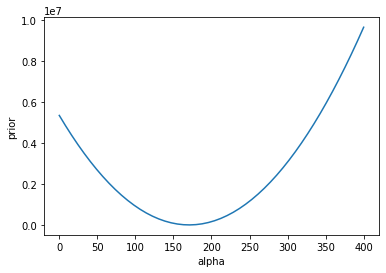

In [76]:
alpha_list = np.linspace(0, 400,50)
prior_list = []
for a in alpha_list:
    prior_list.append(LL_prior(a,delta_f))

plt.plot(alpha_list,prior_list)
plt.ylabel('prior')
plt.xlabel('alpha')

In [97]:
test = np.asarray([0,0,2,3,4])
test = np.where(test == 0, 10, test)
print(test)

[10 10  2  3  4]


In [62]:
nwalkers = 32
ndim = 5 # B0,T0,S0,alpha0,delta0
p0_B0 = np.abs(np.random.normal(S0_guess,0.1*S0_guess,nwalkers))
p0_T0 = np.abs(np.random.normal(0.2,0.05,nwalkers))
p0_S0 = np.random.normal(S0_guess,np.abs(0.1*S0_guess),nwalkers)
p0_alpha0 = np.random.normal(alpha_f,np.abs(0.1*alpha_f),nwalkers)
p0_delta0 = np.random.normal(delta_f,np.abs(0.1*delta_f),nwalkers)
p0 = np.asarray([[p0_B0[i],p0_T0[i],p0_S0[i],p0_alpha0[i],p0_delta0[i]] for i in range(nwalkers)])

In [63]:
vec = p0[0]
print(vec)

ll_test = likelihood_MCMC(vec,m,t,E,ra,dec,eps,counts)
print(ll_test)

[2.97923234e-06 2.48245236e-01 2.67777919e-06 1.42168814e+02
 3.64548514e+00]
17050.37354660034


In [64]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, likelihood_MCMC, args=[m,t,E,ra,dec,eps,counts])

In [65]:
state = sampler.run_mcmc(p0, 100)
sampler.reset()

In [73]:
sampler.run_mcmc(state, 1000);

emcee: Exception while calling your likelihood function:
  params: [ 3.52475151e-05  1.98284731e+02  3.36827683e-04 -7.59236101e+04
  4.93522732e+02]
  args: [7.300000000000004, array([3.37603341e+08, 3.37603341e+08, 3.37603341e+08, ...,
       3.37605041e+08, 3.37605041e+08, 3.37605041e+08]), array([3.36, 3.36, 3.36, ..., 3.96, 3.96, 3.96]), array([170.889, 170.881, 170.872, ..., 170.984, 170.976, 170.976]), array([3.75981, 3.77425, 3.78868, ..., 4.01517, 4.0296 , 4.0296 ]), array([ 61.22497424,  44.68261806,  74.08640524, ..., 263.03446081,
       193.51987062, 196.73658252]), array([0, 0, 0, ..., 0, 1, 0], dtype=int64)]
  kwargs: {}
  exception:


Traceback (most recent call last):
  File "C:\Users\shalm\Anaconda3\lib\site-packages\emcee\ensemble.py", line 619, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "<ipython-input-61-05c55796cb10>", line 30, in likelihood_MCMC
    flux_signal = S0 * T_flux_template(ra,dec,t,duration,alpha0,delta0) * np.exp(-(E-m/2)**2/(2*sigma_E**2)) / np.sqrt(2 * np.pi * sigma_E**2)
  File "C:\Users\shalm\Dropbox\LuminousBasin\code\Shalma code\Likelihood_Functions_ShalmaCopy.py", line 225, in T_flux_template
    T[i] = theta[i]**(-3) * 10**(-10)
KeyboardInterrupt


KeyboardInterrupt: 

In [67]:
samples = sampler.get_chain(flat=True)

Text(0.5, 0, 'B0')

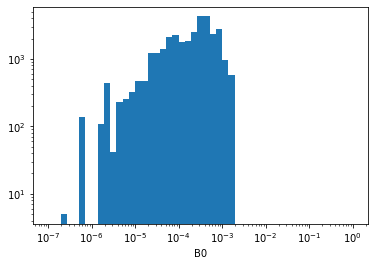

In [72]:
plt.hist(samples[:,0],bins=np.logspace(-7,0,50));
plt.xscale('log'); plt.yscale('log');
plt.xlabel('B0')

Text(0.5, 0, 'T0')

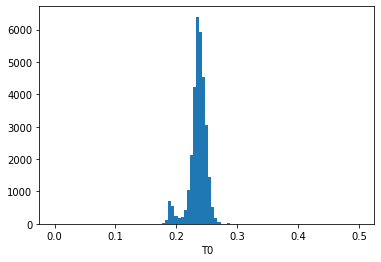

In [101]:
plt.hist(samples[:,1],bins=np.linspace(0,0.5,100));
#plt.xscale('log'); plt.yscale('log');
plt.xlabel('T0')

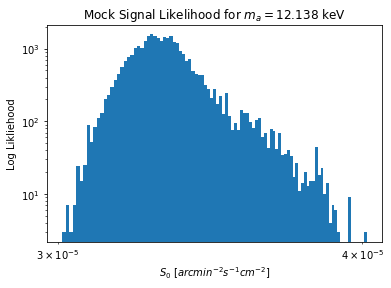

In [151]:
hist = plt.hist(samples[:,2],bins=100)#,bins=np.logspace(-9,34,100));
plt.hist(-samples[:,2],bins=100)
plt.xscale('log'); plt.yscale('log');
plt.xlabel('$S_0$ [$arcmin^{-2}s^{-1}cm^{-2}$]')
plt.ylabel('Log Likliehood')
plt.title('Mock Signal Likelihood for $m_a = 12.138$ keV')
plt.savefig('S0_likelihood_mcmc.png')
#output histogram with 1000 bins
#OR save samples array if it's not too big (np.save)

Text(0.5, 0, 'alpha0')

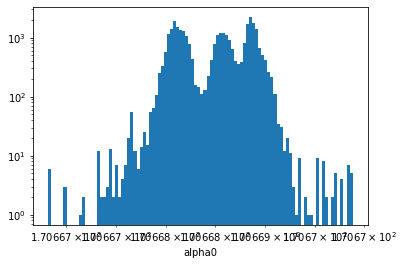

In [103]:
plt.hist(samples[:,3],bins=100)#,bins=np.logspace(-9,34,100));
plt.hist(-samples[:,3],bins=100)
plt.xscale('log'); plt.yscale('log');
plt.xlabel('alpha0')

Text(0.5, 0, 'delta0')

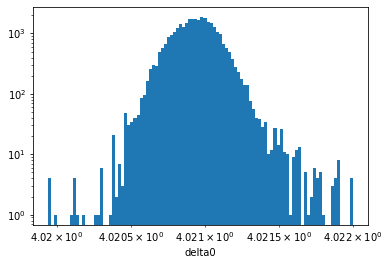

In [104]:
plt.hist(samples[:,4],bins=100)#,bins=np.logspace(-9,34,100));
plt.hist(-samples[:,4],bins=100)
plt.xscale('log'); plt.yscale('log');
plt.xlabel('delta0')

In [85]:
print("Mean acceptance fraction: {0:.3f}".format(np.mean(sampler.acceptance_fraction)))

Mean acceptance fraction: 0.647


In [84]:
print(
    "Mean autocorrelation time: {0:.3f} steps".format(
        np.mean(sampler.get_autocorr_time())
    )
)

AutocorrError: The chain is shorter than 50 times the integrated autocorrelation time for 3 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 20;
tau: [24.604359   24.02606764 24.63488914]

In [164]:
def likelihood_BG_MCMC(model_inputs,m,t,E,ra,dec,eps,counts):
    B0 = model_inputs[0]
    T0 = model_inputs[1]
    #alpha0=170.66855149
    #delta0=4.02092024
    alpha0 = model_inputs[2]
    delta0 = model_inputs[3]
    if T0 < 0:
        return(-10**(20))
    if B0 < 0:
        LL_bg = [-np.abs(np.log(np.abs(S0)))*10**20]
        LL_bg = [0]
        #print('below min B0, S0 = ',S0)
    else:
        flux_bkgd = B0*np.exp(-(E-m/2)/T0)
        mu = flux_bkgd * eps
        LLp = LL_prior(alpha0,delta0)
        LL_bg = counts*np.log(mu)-mu-np.log(factorial_vec(counts)) - LLp
        #print('LL = ',LL)
        if np.isnan(LL_bg).any() == True:
            print('Warning! Nan in LL')
            print('model inputs = ',model_inputs) 
        #mu_bg = flux_bkgd * eps
        #LL_bg = counts*np.log(mu_bg)-mu_bg-np.log(factorial_vec(counts))-LLp
    return(sum(LL_bg))

In [165]:
nwalkers = 32
ndim = 4 # B0,T0,alpha0,delta0
p0_B0 = np.abs(np.random.normal(S0_guess,0.1*S0_guess,nwalkers))
p0_T0 = np.abs(np.random.normal(0.2,0.05,nwalkers))
p0_alpha0 = np.random.normal(alpha_f,np.abs(0.1*alpha_f),nwalkers)
p0_delta0 = np.random.normal(delta_f,np.abs(0.1*delta_f),nwalkers)
p0 = np.asarray([[p0_B0[i],p0_T0[i],p0_alpha0[i],p0_delta0[i]] for i in range(nwalkers)])

In [166]:
sampler_bg = emcee.EnsembleSampler(nwalkers, ndim, likelihood_BG_MCMC, args=[m,t,E,ra,dec,eps,counts])

In [167]:
state = sampler_bg.run_mcmc(p0, 100)
sampler_bg.reset()

In [169]:
sampler_bg.run_mcmc(state, 1000);

In [170]:
samples_bg = sampler_bg.get_chain(flat=True)

Text(0.5, 0, 'B0')

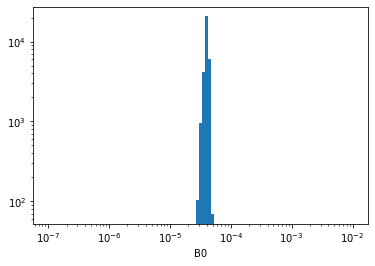

In [171]:
plt.hist(samples[:,0],bins=np.logspace(-7,-2,100));
plt.xscale('log'); plt.yscale('log');
plt.xlabel('B0')

## Save Results

In [85]:
# Appends m, B0_star, T0_star, S0_star to a csv file (one file for all masses)
d1 = {'m': m,'B0_star': [B0_star], 'T0_star': [T0_star], 'S0_star':[S0_star],'LL_star':[LL_star]}
df_star = pd.DataFrame(data=d1)

with open('output_star.csv', 'a') as f:
    df_star.to_csv(f, index=False, mode='a',header=f.tell()==0)

In [86]:
# Creates a new csv file for each axion mass
d2 = {'S0': S0_list, 'Optimal LL': LL_optimum}
df_LL = pd.DataFrame(data=d2)

with open('output_LL_%s.csv'%i_m, 'a') as f:
    df_LL.to_csv(f, index=False, mode='a',header=True)

In [236]:
m_list_test = np.arange(5.0,25.0,sigma_E)
m_list_test[113]

23.75800000000004

In [88]:
# Output: B0_star, T0_star, S0_star, S0_list, LL_optimum
# 12 min for mass of 4 keV
# 4 min for mass of 7.6 keV

In [124]:
# Creates a new csv file for each axion mass
d3 = {'S0': samples[:,2]}
df_S0_hist = pd.DataFrame(data=d3)

with open('test2_output_S0_hist_%s.csv'%i_m, 'a') as f:
    df_S0_hist.to_csv(f, index=False, mode='a',header=True)

In [ ]:
# FROM OLD CLUSTER CODE:
#d1 ={'m':[m],'B0_star':[B0_star],'T0_star':[T0_star],'S0_star':[S0_star],'S0_1sig_p$
#df_star = pd.DataFrame(data=d1)
#with open('Output/Results/Mock_6_take3/output_star.csv', 'a') as f:
#    df_star.to_csv(f, index=False, mode='a',header=f.tell()==0)

#d2 = {'m':[m]*len(S0_list),'S0': S0_list, 'Optimal LL': LL_optimum}
#df_LL = pd.DataFrame(data=d2)
#with open('Output/Results/Mock_6_take3/output_LL_%s.csv'%i_m, 'a') as f:
#    df_LL.to_csv(f, index=False, mode='a',header=True)

## Power Constrained Limit